# Exercise 1

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline.
Twitter data was scraped from February of 2015 and contributors were
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Se lee un archivo de csv de una ruta de github
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [ ]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Se observa que los tweets de las aerolineas en su mayoria se representan por la clasificación negativa por parte de los usuarios

### Proportion of tweets per airline


In [ ]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Se observa que la aerolinea United es la que mas se menciona en los tweets, lo contrario pasa con la aerolina Virgin America

<Axes: >

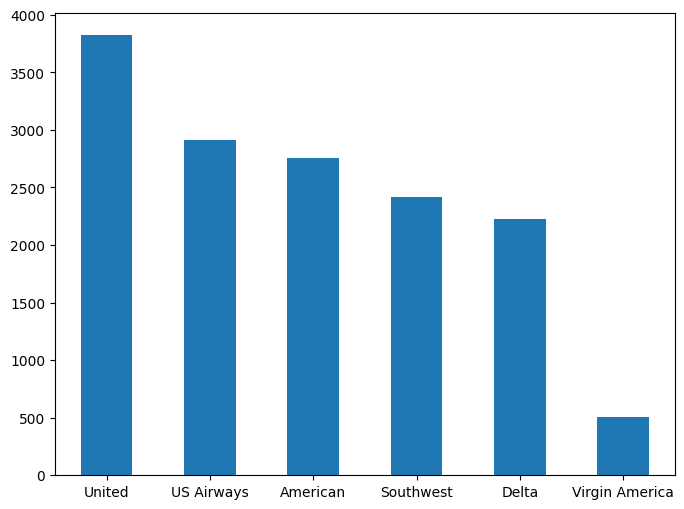

In [ ]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

<Axes: title={'center': 'Sentiment by airline'}, xlabel='airline'>

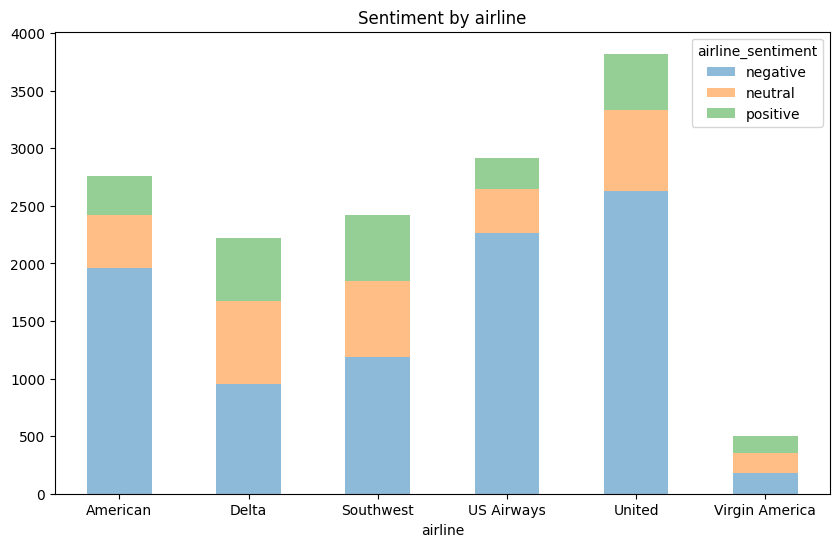

In [ ]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

De la gráfica anterior se evidencia que Southwest es la aerolinea con mayores tweets positivos. Sin embargo, la aerolinea Virgin America es la que tiene una mayor proporción de tweets positivos si se compara contra ella misma (muy balanceado con las otras categorias).
Por otra parte, United es la aerolina con mayores tweets negativos

# Exercise 1.1

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [ ]:
#Se importan librerias para entrenar modelos, vectorizar texto, construir bosquea aleatorios y estemizar
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
#Los textos de los tweets son la variable explicativa, mientras que la clasificación del sentimiento hacia la aerolinea es la variable dependiente
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
#Vectorización
vect = CountVectorizer()
# Se convierte el texto en una matriz de palabras y representa la frecuencia de cada palabra en cada documento
X_dtm = vect.fit_transform(X)

In [ ]:
X_dtm

<14640x15051 sparse matrix of type '<class 'numpy.int64'>'
	with 234281 stored elements in Compressed Sparse Row format>

In [ ]:
X_dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
temp=X_dtm.todense()
temp

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vect.vocabulary_

{'virginamerica': 14273,
 'what': 14551,
 'dhepburn': 4804,
 'said': 11646,
 'plus': 10438,
 'you': 14944,
 've': 14193,
 'added': 1965,
 'commercials': 4030,
 'to': 13326,
 'the': 13120,
 'experience': 5665,
 'tacky': 12925,
 'didn': 4821,
 'today': 13330,
 'must': 9234,
 'mean': 8837,
 'need': 9375,
 'take': 12941,
 'another': 2331,
 'trip': 13509,
 'it': 7685,
 'really': 11020,
 'aggressive': 2054,
 'blast': 3070,
 'obnoxious': 9726,
 'entertainment': 5455,
 'in': 7381,
 'your': 14953,
 'guests': 6733,
 'faces': 5740,
 'amp': 2263,
 'they': 13167,
 'have': 6868,
 'little': 8392,
 'recourse': 11078,
 'and': 2281,
 'big': 3007,
 'bad': 2746,
 'thing': 13176,
 'about': 1862,
 'seriously': 11914,
 'would': 14778,
 'pay': 10175,
 '30': 761,
 'flight': 6004,
 'for': 6157,
 'seats': 11832,
 'that': 13115,
 'this': 13188,
 'playing': 10403,
 'only': 9836,
 'flying': 6101,
 'va': 14145,
 'yes': 14922,
 'nearly': 9371,
 'every': 5572,
 'time': 13270,
 'fly': 6086,
 'vx': 14345,
 'ear': 5238,


In [ ]:
#Hay 14640 documentos con 15051 caracteristicas
X_dtm.shape

(14640, 15051)

In [ ]:
print(list(vect.vocabulary_.keys())[-150:-100])

['us874', 'inventory', '3a', '8c', 'americanforlife', 'fiscal', '2440', 'aa2416', 'guc', '7403607771', 'gvn', 'nxqijcojnj', 'tcunningham10', 'jacquelyn', '2251', 'tomo', '245', 'stucked', 'aadelay', '2954', 'junction', 'amazingflightcrew', 'aftr', 'bng', 'hstg', 'refsd', 'med', 'fnd', 'cnceld', 'downloaded', 'cop', 'fcuk', 'vacancies', '343', 'yokkhhqcmp', 'karabuxthomps', 'renewed', 'pe', 'thnkx', 'bt', 'sux', 'otty5rymzd', '2312', 'worlds', 'macario2', '8004337300', 'golfwithwoody', 'woody', 'aa2227', 'miatoiah']


In [ ]:
# Se convierte la matriz dispersa X_dtm en densa, luego se accede al primer documento en la colección de documentos representados para encontrar el índice del término que tiene la frecuencia más alta en ese primer documento.
X_dtm.todense()[0].argmax()

4804

In [ ]:
#RandomForest: Se aplica el metodo de clasificación de bosque aleatorio y se hace una validación cruzada partiendo la base en 5 partes
rf=RandomForestClassifier()
pd.Series(cross_val_score(rf, X_dtm, y, cv=5)).describe()

count    5.000000
mean     0.726913
std      0.026016
min      0.685792
25%      0.720628
50%      0.732923
75%      0.741120
max      0.754098
dtype: float64

In [ ]:
# Se define una función que acepta un vectorizador y calcula el accuracy
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    rf = RandomForestClassifier()
    print(pd.Series(cross_val_score(rf, X_dtm, y, cv=5)).describe())

In [ ]:
print(pd.Series(cross_val_score(rf, X_dtm, y, cv=5)).describe())

count    5.000000
mean     0.728005
std      0.025849
min      0.688183
25%      0.717213
50%      0.736339
75%      0.747268
max      0.751025
dtype: float64


Este modelo tiene un rendimiento para clasificar el sentimiento de los tweets en un 72,8%

# Exercise 1.2

Se remueven stopwords, luego se predice el sentimiento usando CountVectorizer.

use Random Forest classifier

In [ ]:
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])

    rf = RandomForestClassifier()
    scores = cross_val_score(rf, X_dtm, y, cv=5)
    print(pd.Series(scores).describe())


vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  14770
count    5.000000
mean     0.699317
std      0.049052
min      0.627732
25%      0.669399
50%      0.725751
75%      0.730191
max      0.743511
dtype: float64


Usando el vectorizador disminuye un 3% de rendimiento en la clasificación del modelo

# Exercise 1.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [ ]:
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])

    rf = RandomForestClassifier()
    scores = cross_val_score(rf, X_dtm, y, cv=5)
    print(pd.Series(scores).describe())

vect = CountVectorizer(ngram_range=(1, 2), max_features=1000) #Se vectoriza tomando ngramas de 1 a 2 palabras y se maximiza a 1000 caracteristicas
tokenize_test(vect)

Features:  1000
count    5.000000
mean     0.704235
std      0.065587
min      0.592213
25%      0.700820
50%      0.733948
75%      0.740437
max      0.753757
dtype: float64


Sigue siendo un mejor modelo el random forest sin vectorización ya que con esta forma de vectorizar es 2% menos efectivo en predecir las clases de sentimientos

In [ ]:
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])

    rf = RandomForestClassifier()
    scores = cross_val_score(rf, X_dtm, y, cv=5)
    print(pd.Series(scores).describe())

vect = CountVectorizer(stop_words='english')
vect = CountVectorizer(ngram_range=(1, 2), max_features=1000)
tokenize_test(vect)

Features:  1000
count    5.000000
mean     0.703415
std      0.072061
min      0.579235
25%      0.702527
50%      0.737363
75%      0.744194
max      0.753757
dtype: float64


In [ ]:
print(vect)

CountVectorizer(max_features=1000, ngram_range=(1, 2))


# Exercise 1.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [ ]:

# Vectorización utilizando TfidfVectorizer
vect = TfidfVectorizer()
X_dtm = vect.fit_transform(X)

In [ ]:
# Definir una función que acepta un vectorizador y calcula la precisión
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    rf = RandomForestClassifier()

    # Imprimir estadísticas de validación cruzada
    print(pd.Series(cross_val_score(rf, X_dtm, y, cv=5)).describe())

In [ ]:
# Llamar a la función con TfidfVectorizer
tokenize_test(vect)

Features:  15051
count    5.000000
mean     0.717213
std      0.021676
min      0.685451
25%      0.711407
50%      0.714139
75%      0.736680
max      0.738388
dtype: float64


El random forest inicial sigue siendo mejor modelo ya que mantiene un AUC superior

In [ ]:
vect2= TfidfVectorizer(stop_words='english')

In [ ]:
# Llamar a la función con TfidfVectorizer
tokenize_test(vect2)

Features:  14770
count    5.000000
mean     0.698156
std      0.046540
min      0.626708
25%      0.676571
50%      0.717555
75%      0.733265
max      0.736680
dtype: float64


Integrantes:

*   Rosemary Ríos Pulido
*   John Sebastian Martinez Cipagauta
*   Carlos Felipe Mora Garzón
*   Ian Nicolas Rincon Tavera
*   Andres Parra
